In [90]:
# TODO:
#  Certains model nom doublé ex (x-trail x-trail)
#  Alphabet géorgien à extraire des modèles
#  Suppr des classes pas suffisement représentés ?
#  Vérifier le type des series

In [91]:
import pandas as pd
import pandas
import matplotlib.pyplot as plt
from cleaning_func import clean_manufacturer, clean_mileage, clean_price, clean_engine_volume, clean_doors, clean_model, clean_cylinders, clean_wheel_v2, clean_leather_interior_v2

In [92]:
df = pd.read_csv('./original.csv')

In [93]:
# Suppression des doublons
df.drop_duplicates(keep='first', inplace=True)

In [94]:
# Colonnes enlevés: ID, Levy, Airbags
df = df[['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior',
         'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color','Airbags']]

In [95]:
df = clean_manufacturer(df, ['სხვა', 'TESLA'],
                        'Manufacturer')  # Manufacturer => 3 lignes
df = clean_price(df, min=500, max=1000000)  # Price => 1664 lignes
df = clean_mileage(df, min=500, max=1000000)  # Mileage => 677 lignes
df = clean_engine_volume(df, 0.5, 8)  # Engine volume => 28 lignes
df = clean_cylinders(df, min=3.0, max=12)  # Cylinders => 37 lignes
df = clean_doors(df)  # Doors => 0 lignes
df = clean_model(df)  # Model => 0 lignes
df = clean_wheel_v2(df)  # Wheel => 0 lignes
df = clean_leather_interior_v2(df)  # Leather interior => 0 lignes

In [96]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.head())

   Price Manufacturer    Model  Prod. year   Category Leather interior Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels Doors        Wheel   Color  Airbags  Turbo
0  13328        LEXUS   RX 450        2010       Jeep          leather    Hybrid            3.5   186005        6.0     Automatic          4x4     5   Left_wheel  Silver       12  False
1  16621    CHEVROLET  Equinox        2011       Jeep       no_leather    Petrol            3.0   192000        6.0     Tiptronic          4x4     5   Left_wheel   Black        8  False
2   8467        HONDA      FIT        2006  Hatchback       no_leather    Petrol            1.3   200000        4.0      Variator        Front     5  Right_wheel   Black        2  False
3   3607         FORD   Escape        2011       Jeep          leather    Hybrid            2.5   168966        4.0     Automatic          4x4     5   Left_wheel   White        0  False
4  11726        HONDA      FIT        2014  Hatchback          leather

In [97]:
liste_price = []
for elt in df['Airbags'].unique():
    liste_price.append(elt)

liste_price.sort()
print(liste_price)

for elt in liste_price:
    print(elt)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


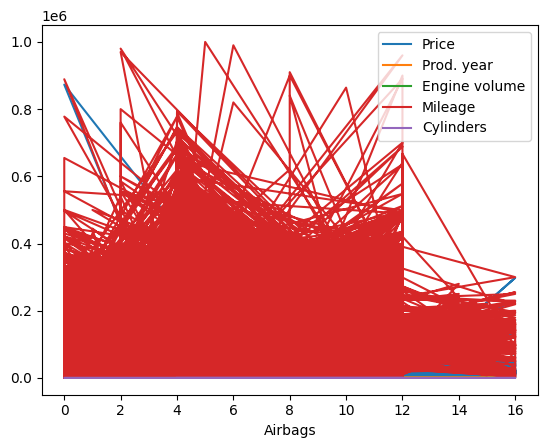

In [98]:
df.plot(kind='bar', x='Airbags', y='Price')
plt.show()